# Q1

## 1a

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(f, gradf, x0, iterations=1000, eta=0.2):

    #values of x, f(x) and gradf(x) will be stored at each step so
    #they can be plotted later
    
    x_values = np.full_like([x0], x0)                
    f_values = np.full_like([f(x0)], f(x0))             
    gradf_values = np.full_like([gradf(x0)], gradf(x0))

    epsilon = 0.00000001

    for i in range(iterations):
        
        next_x = x_values[i] - eta*gradf_values[i]
        
        #append the values of x, f(x) and gradf(x) at each step
        x_values = np.vstack([x_values, next_x])       
        f_values = np.vstack([f_values, f(next_x)])
        gradf_values = np.vstack([gradf_values, gradf(next_x)])

        #squeeze just allows for scalars to be returned as
        #scalars rather than length one arrays
        if np.linalg.norm(next_x - x_values[i]) < epsilon:
            return(np.squeeze(next_x), np.squeeze(x_values),                 
                   np.squeeze(f_values), np.squeeze(gradf_values), i+1)      
    
    #raise an error if no convergence after the given number of iterations
    raise ValueError                          

We choose an arbitrary univariate function that we know has a local minumum, for example $$f(x) = x^{3}+x^{2}-5x-2$$ This has gradient $$\nabla f = \frac{df}{dx} = 3x^2 +2x-5$$ Let's plot this function for intuition

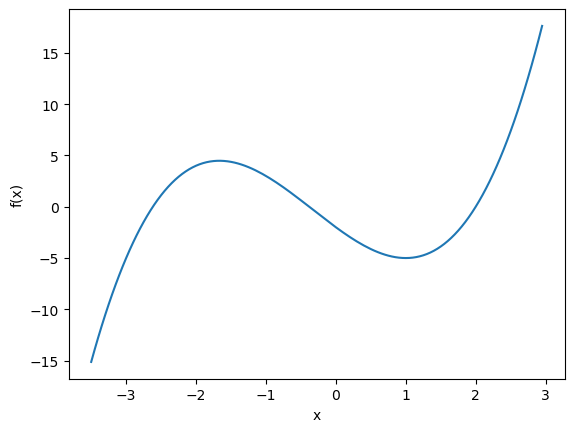

In [8]:
f = lambda x : x**3 + x**2 - 5*x - 2
gradf = lambda x : 3*(x**2) + 2*x - 5

temp = np.arange(-3.5,3,0.05)
plt.plot(temp, f(temp))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

This function has a local minimum at exactly 1, so let's test our `gradient_descent` function to see if it finds it.

Local minimum at x =  0.9999999977095198


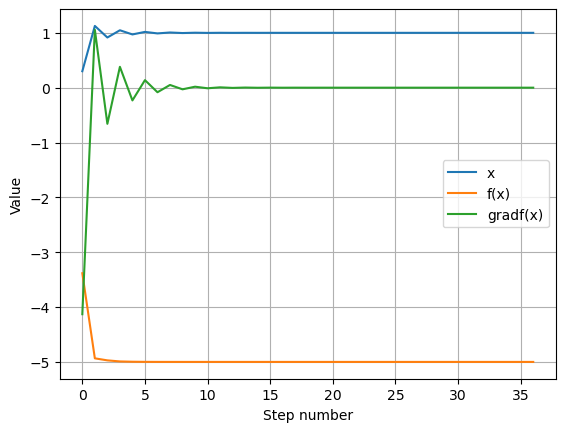

In [9]:
results = gradient_descent(f,gradf,0.3)
print("Local minimum at x = ", results[0])

plt.plot(range(results[4]+1), results[1], label="x")
plt.plot(range(results[4]+1), results[2], label="f(x)")
plt.plot(range(results[4]+1), results[3], label="gradf(x)")
plt.legend()
plt.xlabel("Step number")
plt.ylabel("Value")
plt.grid(True)
plt.show()

The `gradient_descent` function successfully finds the local minimum at $x=1$

## 1b

To find a local maximum, we can simply multiply the input function by -1, flipping it in the x-axis, causing local minima to become local maxima. We can then use gradient descent on this "flipped" function to find the maxima of the original function. In our example, $f$ has a local maxima at $-\frac{5}{3}$, so let's test again.

In [10]:
def gradient_ascent(f, gradf, x0, iterations=1000, eta=0.2):
    flipped_f = lambda x : -f(x)
    flipped_gradf = lambda x : -gradf(x)
    return(gradient_descent(flipped_f, flipped_gradf, x0, iterations, eta))

Local minimum at x =  -1.666666664101012


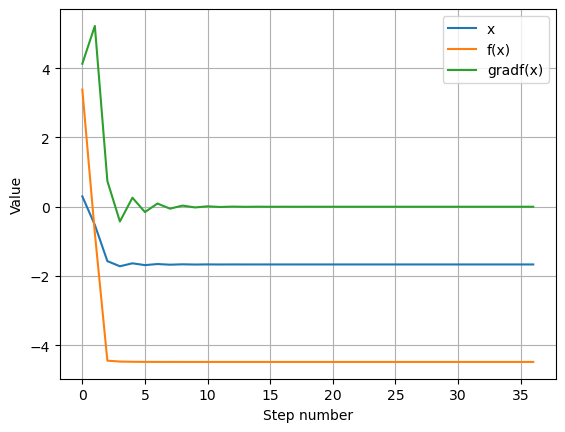

In [11]:
results = gradient_ascent(f,gradf,0.3)
print("Local minimum at x = ", results[0])

plt.plot(range(results[4]+1), results[1], label="x")
plt.plot(range(results[4]+1), results[2], label="f(x)")
plt.plot(range(results[4]+1), results[3], label="gradf(x)")
plt.legend()
plt.xlabel("Step number")
plt.ylabel("Value")
plt.grid(True)
plt.show()

`gradient_ascent` successfully finds the local maximum.

## 1c

### (i)

We have $f(x,y) = (x-1)^2 + 100(x^2-y)^2$. Both terms are always non-negative because they are the square of an expression, thus $f(x,y)$ is always non-negative and we have (local) minima when $f(x,y) = 0$, which only happens when both $x-1 =0$ and $x^2-y=0$. These equations give a unique solution of $(x,y) = (1,1)$, thus $(1,1)$ is the unique global minimum of f.

### (ii)

We have $$\nabla f = (\frac{\partial f}{\partial x}(x,y), \frac{\partial f}{\partial y}(x,y)) = (2x -2 +400x^3 -400xy, -200x^2 +200y)$$ In Python, this is the following function, along with f(x,y) as a Python function

In [13]:
def f(x):
    return ((x[0]-1)**2 + 100*(x[0]**2 - x[1])**2)

def gradf(input):
    x = input[0]
    y = input[1]
    return(np.array([2*x - 2 + 400*x**3 - 400*x*y, -200*x**2 + 200*y]))

### (iii)

We see below that our `gradient_descent` function does not converge for this input. After experimenting with many different values for `eta` and `iterations`, we failed to find any combination such that the function converges. To fix this issue, one may suggest raising the value of `epsilon` slightly, but this causes the function to converge to an incorrect value for the minimum. 

In [14]:
try:
    results = gradient_descent(f,gradf,np.array([3,4]))
    print("Local minimum:", results[0])
except ValueError:
    print("Does not converge in the given number of steps")

Does not converge in the given number of steps


C:\Users\Ed\AppData\Local\Temp\ipykernel_20928\3793392512.py:2: RuntimeWarning: overflow encountered in scalar power
  return ((x[0]-1)**2 + 100*(x[0]**2 - x[1])**2)
C:\Users\Ed\AppData\Local\Temp\ipykernel_20928\3793392512.py:7: RuntimeWarning: overflow encountered in scalar power
  return(np.array([2*x - 2 + 400*x**3 - 400*x*y, -200*x**2 + 200*y]))
C:\Users\Ed\AppData\Local\Temp\ipykernel_20928\3793392512.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  return(np.array([2*x - 2 + 400*x**3 - 400*x*y, -200*x**2 + 200*y]))


## 1d

In [15]:
# this function is almost identical to gradient_descent except for...
def momentum(f, gradf, x0, iterations=1000, eta=0.2, alpha = 0.9):
    
    #here where we start with two terms x_0 and x_-1
    x_values = np.vstack([np.full_like([x0], x0),x0])
    f_values = np.vstack([np.full_like([f(x0)], f(x0)),f(x0)])
    gradf_values = np.vstack([np.full_like([gradf(x0)], gradf(x0)),gradf(x0)])

    epsilon = 0.00000001

    for i in range(1,iterations):
        
        #and here where we add the alpha term
        next_x = x_values[i] - eta*gradf_values[i] + alpha*(x_values[i] - x_values[i-1])
        
        x_values = np.vstack([x_values, next_x])
        f_values = np.vstack([f_values, f(next_x)])
        gradf_values = np.vstack([gradf_values, gradf(next_x)])

        if np.linalg.norm(next_x - x_values[i]) < epsilon:
            return(np.squeeze(next_x), np.squeeze(x_values), 
                   np.squeeze(f_values), np.squeeze(gradf_values), i)
    
    raise ValueError

After experimenting with the `momentum` function, we found the following values for `alpha`, `eta` and `iterations` such that the function converges to the correct global minimum, $(1,1)$.

In [16]:
try:
    results = momentum(f,gradf,np.array([3,4]), alpha=0.99, eta=0.0002, iterations=10000)
    print("Local minimum [x,y] = ", results[0])
except ValueError:
    print("Does not converge in the given number of steps")

Local minimum [x,y] =  [1.00000087 1.00000196]


Adding momentum allows us to find the local minimum where it was not possible before.